# Usage for parse ground truth file and show
This is a demo for parse, visulize and split the data, the demo use the data in example folder,
but the folder does not neccessaryly include all the categories.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
from DOTA import DOTA
# import dota_utils as util
import pylab
pylab.rcParams['figure.figsize'] = (20.0, 20.0) # 调整显示图像大小

ImportError: attempted relative import with no known parent package

In [7]:
example = DOTA('example',parseMode = 'parse_dota_rec') # DOTA类

 Error: example/labelTxt/test1.zip is not a .txt file
 DOTA dataset has been successfully loaded 


In [21]:
imgids = example.getImgIds(catNms=['plane'])
imgid = imgids[0]
img = example.loadImgs(imgid)[0]
# 调试
print(img.shape)

加载图片ID完成：共有 1 张图片符合筛选条件
(1903, 1599, 3)


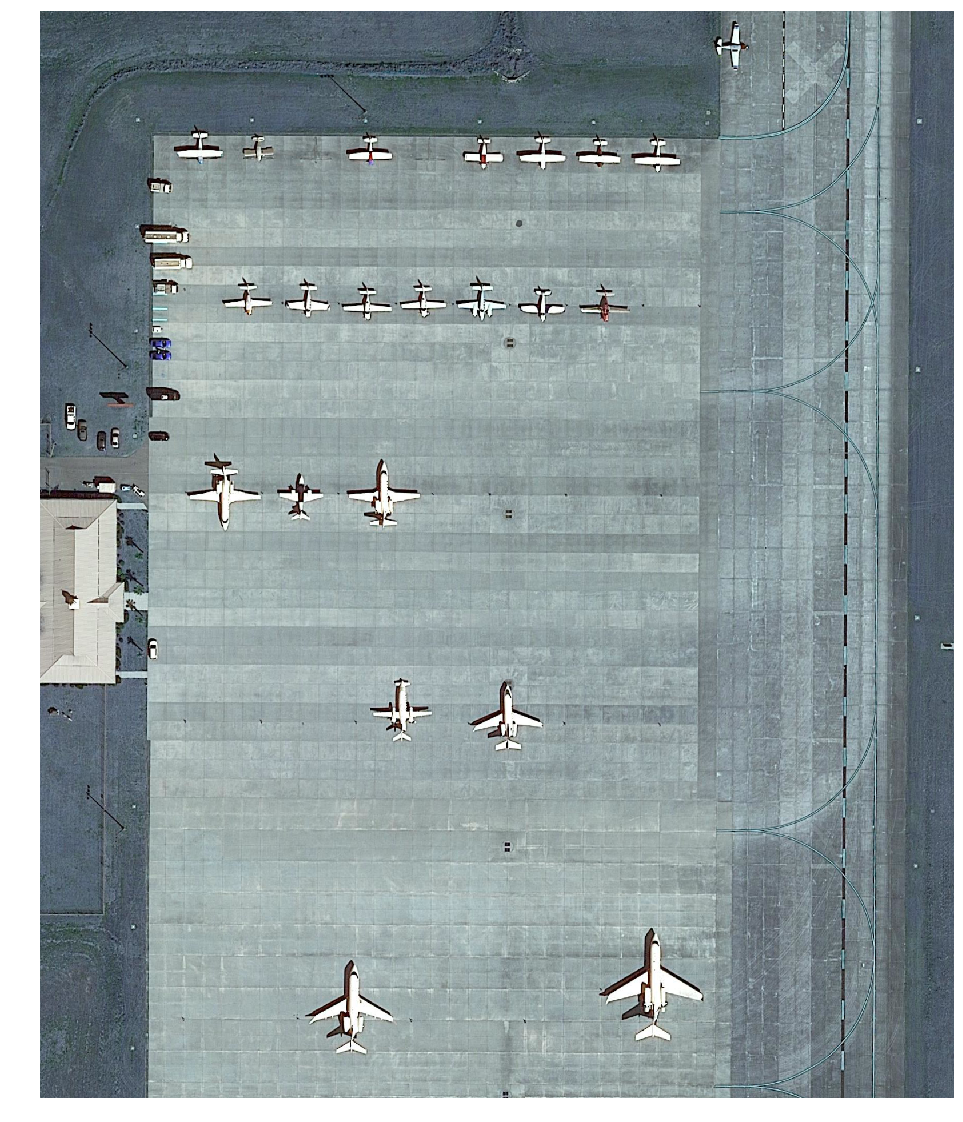

In [22]:
plt.axis('off')

plt.imshow(img)
plt.show()

In [1]:
anns = example.loadAnns(catNms=['plane'], imgId=imgid)
print(len(anns))
example.showAnns(anns, imgid, 2)

NameError: name 'example' is not defined

## Split Image And Label
We provide the scale param before split the images and labels.
Sometimes, the instance is too large that it can be easily cut down(for example, ground track filed), in such case you need to set the param "rate" less than 1.

Before going on, first create folder to store the split data
```
  mkdir examplesplit
  mkdir examplesplit/images
  mkdir examplesplit/labelTxt
```
For test images, you only need to split images, refer to "SplitOnlyImage.py"

In [13]:
from ImgSplit import splitbase

In [14]:
split = splitbase(r'example', 
                 r'examplesplit', subsize = 406, choosebestpoint=True)
#split.splitdata(0.5)
split.splitdata(1)
#split.splitdata(2)

In [15]:
examplesplit = DOTA('examplesplit',parseMode = 'parse_dota_rec')

 DOTA dataset has been successfully loaded 


In [16]:
imgids = examplesplit.getImgIds(catNms=['plane'])
print(len(imgids))
imgid = imgids[2]
print(imgid)
img = examplesplit.loadImgs(imgid)[0]
print(img.shape)

加载图片ID完成：共有 15 张图片符合筛选条件
15
P1088__1__0__0
(406, 406, 3)


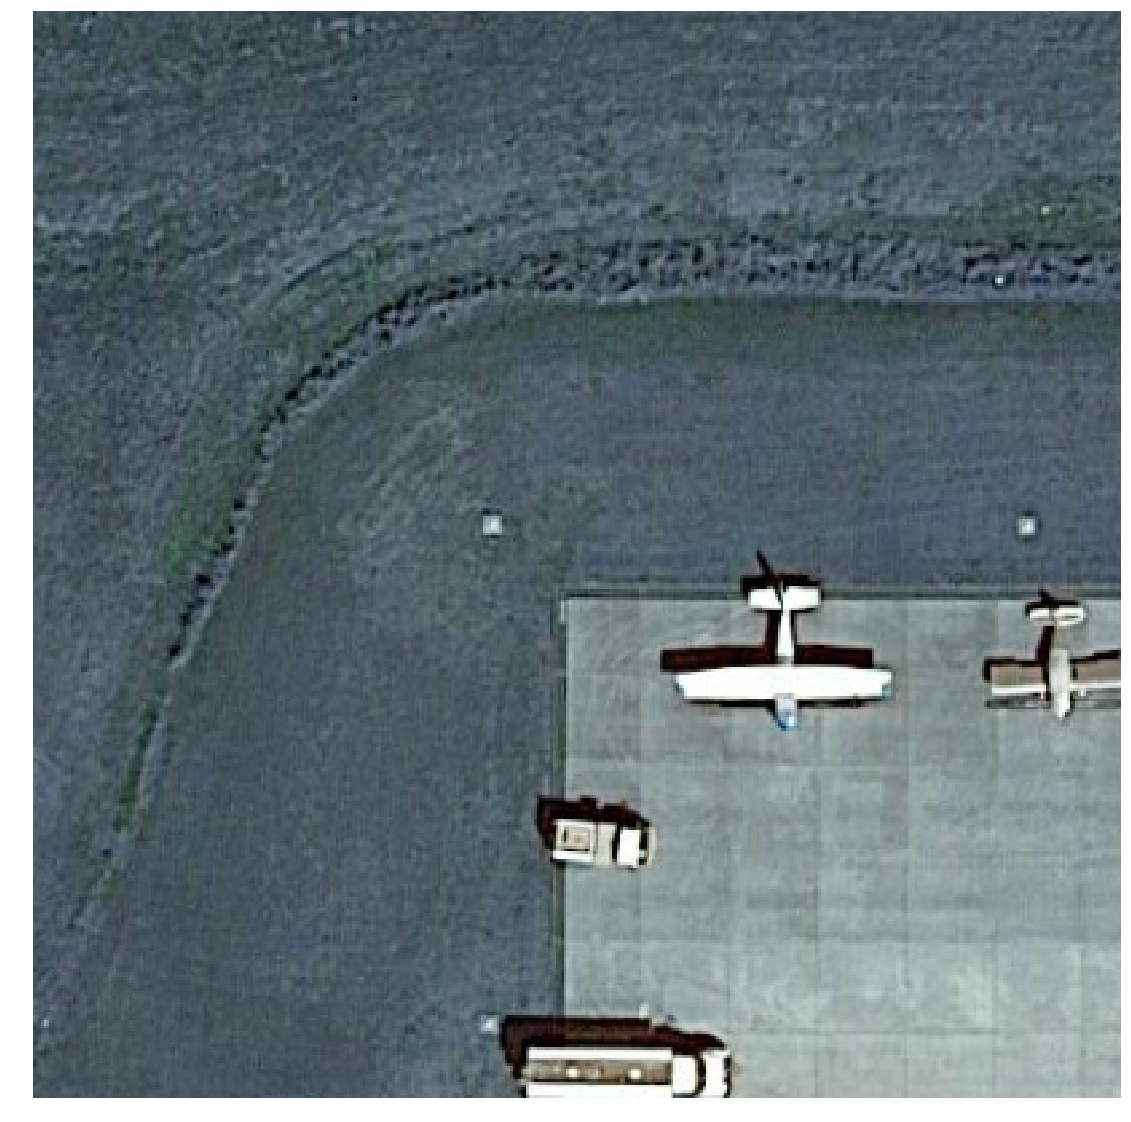

In [17]:
plt.axis('off')

plt.imshow(img)
plt.show()

[{'name': 'plane', 'difficult': '0', 'poly': [(406.0, 263.0), (358.0, 267.0), (353.0, 224.0), (406.0, 221.0)], 'area': 2155.0, 'bndbox': (353.0, 221.0, 406.0, 267.0)}, {'name': 'large-vehicle', 'difficult': '0', 'poly': [(261.0, 384.0), (260.0, 406.0), (182.0, 406.0), (184.0, 385.0)], 'area': 1665.5, 'bndbox': (182.0, 384.0, 261.0, 406.0)}, {'name': 'plane', 'difficult': '0', 'poly': [(321.0, 267.0), (241.0, 268.0), (239.0, 214.0), (323.0, 217.0)], 'area': 4264.0, 'bndbox': (239.0, 214.0, 323.0, 268.0)}]


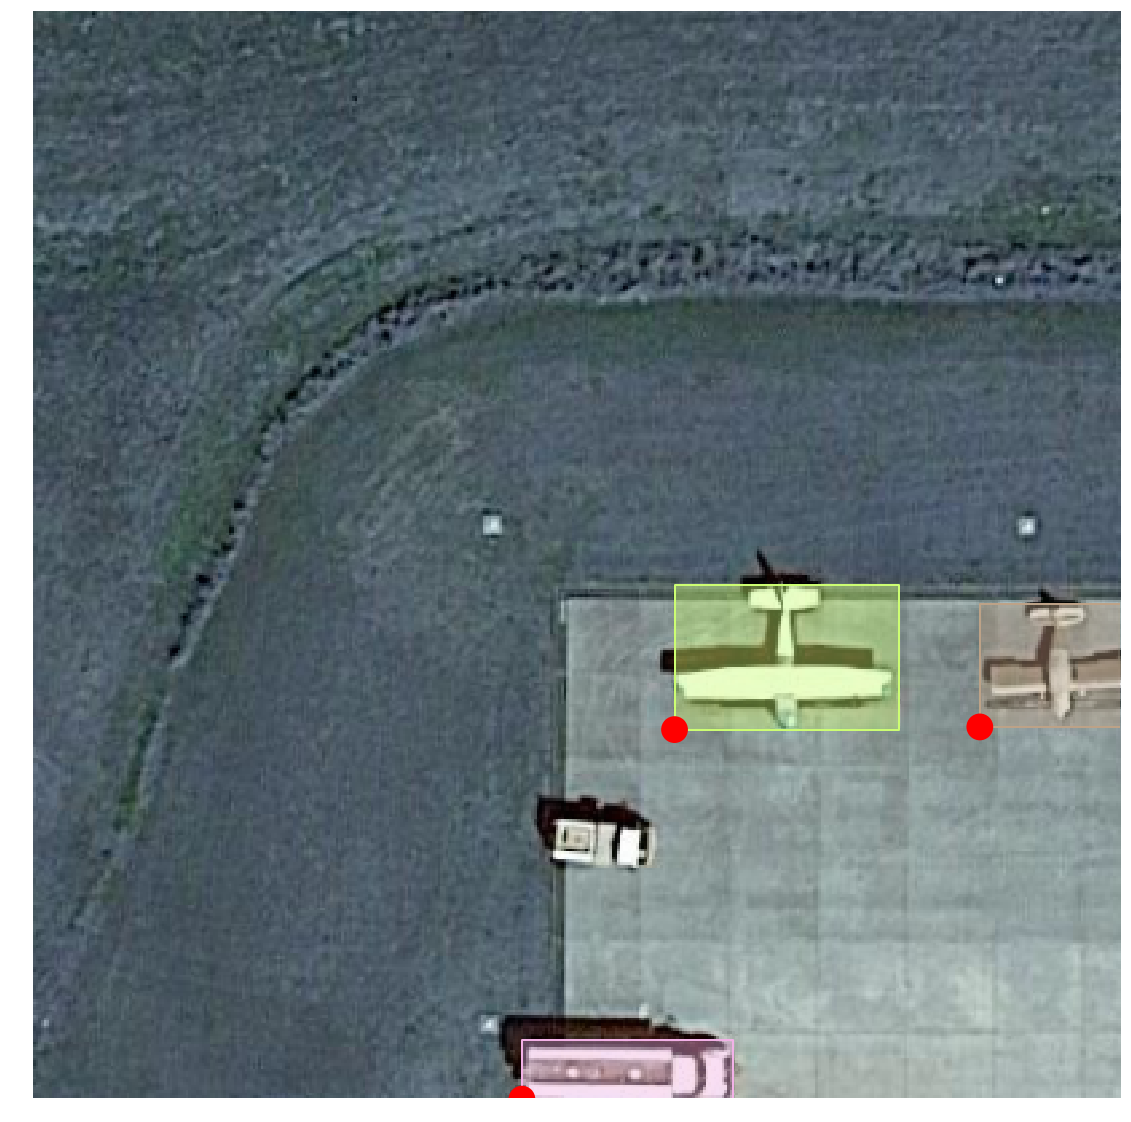

In [18]:
anns = examplesplit.loadAnns(imgId=imgid)
print(anns)
examplesplit.showAnns(anns, imgid, 2)

## Merge patches
Now, we will merge these patches to see if they can be restored in the initial large images

In [12]:
from ResultMerge import mergebypoly

In [13]:
util.groundtruth2Task1(r'examplesplit/labelTxt',
                      r'Task1')
mergebypoly(r'Task1',
           r'Task1_merge')
util.Task2groundtruth_poly(r'Task1_merge',
                          r'restoredexample/labelTxt')

FileNotFoundError: [Errno 2] No such file or directory: 'Task1/Task1_plane.txt'

In [ ]:
filepath = 'example/labelTxt'
imgids = util.GetFileFromThisRootDir(filepath)
imgids = [util.custombasename(x) for x in imgids]
print(imgids)

In [ ]:
example = DOTA(r'example')
num = 2
anns = example.loadAnns(imgId=imgids[num])
# print(anns)
example.showAnns(anns, imgids[num], 2)

In [ ]:
restored = DOTA(r'restoredexample')
num = 2
anns = restored.loadAnns(imgId=imgids[num])
# print(anns)
restored.showAnns(anns, imgids[num], 2)

In [ ]:
import Shapely

In [ ]:
import os
b = 0
a = (b != 0)
a


In [ ]:
k = ['a','b','c','d','e','f']
a = list(enumerate(k))
print(a)

In [ ]:
from collections import defaultdict
a = ['1','2','3','4','5']
b = defaultdict(list)
b["12"]

In [ ]:
test = [1,2,3,4,5,6]
val = set([7,8,8,9])
val &= set(test)
val

In [ ]:
import dota_utils
dir(dota_utils.dota_utils)

In [ ]:
a = DOTA('example')
imgids = a.getImgIds(catNms=['ship', 'storage-tank'])
imgid = imgids[0]
img = a.loadImgs(imgid)[0]